## Read Data Functions

In [1]:
#Import 
from tracemalloc import Statistic
import nltk,re,pandas as pd,random,numpy as np
from nltk.corpus import stopwords 
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

import nltk
try:
  nltk.data.find('corpora/wordnet') # ????/wordnet
except LookupError:
  nltk.download('wordnet')

ModuleNotFoundError: No module named 'nltk'

In [ ]:
class TextDataPartitioning:  # Create Class to generalize the program

    Partitioning_DataFrame2 = pd.DataFrame()
    
    def ReadBooks(Book_Name):  # This function will take Book_Name as parameter for example: austen-emma.txt
        return nltk.corpus.gutenberg.raw(Book_Name)  # Convert NLTK books to string datatype
    
    def GetTitle(Book_Name):  # This function will take Book_Name as parameter for example: austen-emma.txt
        Book = TextDataPartitioning.ReadBooks(Book_Name)  # Call ReadBooks function
        TextDataPartitioning.Book_Title = re.findall('^\[(.*)\]', Book)  # Use re.findall to extract and assign the title of the book to list datatype variable
        TextDataPartitioning.Book_Title = TextDataPartitioning.Book_Title[0] # Convert list datatype to string datatype
        return TextDataPartitioning.Book_Title # Return book title as string datatype
    
    def BookPreProcessing(Book_Name):   # This function will take Book_Name as parameter for example: austen-emma.txt
        Book = TextDataPartitioning.ReadBooks(Book_Name)  # Call ReadBooks function
        TextDataPartitioning.Book_Title = '[' + TextDataPartitioning.Book_Title + ']'  # Add [] to the book title to be able to remove it with the square brackets from the book
        Book = Book.replace(TextDataPartitioning.Book_Title,'')  # Remove book title from the book
        Book = re.sub('(CHAPTER(.*))|(Chapter(.*))', '', Book)  # Remove chapter title from the book
        Book = re.sub('(VOLUME(.*))|(Volume(.*))', '', Book)  # Remove Volume title from the book  
        Book = re.sub('^$\n', '', Book, flags = re.MULTILINE)  # Remove empty lines
        Book = re.sub('\. *(\W)','.\n\n', Book)  # Create a new line after each fullstop
        Book = re.sub('[^\w\s]','', Book)  # Remove punctuation marks from the book
        Book = re.sub(r'\b\w{1,2}\b', '',Book)
        Book = re.sub(r'(http|https|ftp)://[a-zA-Z0-9\\./]+', '', Book)
        Book = re.sub("[^a-zA-Z]", " ",Book)
        Book = Book.lower()  # Convert the book to small text
        Book = Book.split()  # Convert the book to list datatype
        StopWords = set(stopwords.words('english'))
        lemmatizer = WordNetLemmatizer()
        ps = PorterStemmer()

        Book = [ ps.stem( lemmatizer.lemmatize(word)) for word in Book if not word in StopWords]  # Remove stopwords from this list
        return Book  # Return the book list datatype

    def BookPartitioning(Text):
        PhargraphList=[]
        TextLen= len(Text)
        
        
        NumberOfParagraph = TextLen // 150
        
        for i in range(1,NumberOfParagraph):
            startIndex = i*150 - 150
            endIndex = (i-1)*150+150
            
            if(endIndex >= len(Text)):
                endIndex = len(Text) - endIndex
            
            PhargraphList.append(Text[startIndex : endIndex])
        return PhargraphList
 

    def CreateDataFrame1(Partitions_list, Book_Title):
        DFparagraphs = pd.DataFrame(columns =["paragraph","Authors"])
     
        random.seed(41)
        #choose 200 random paragaph from all paragaphs
        Partitions_list=random.choices(Partitions_list, k=200)
        
        data = {'paragraph':Partitions_list,'Authors':Book_Title}
        
        DFparagraphs = DFparagraphs.append( pd.DataFrame(data))

        return DFparagraphs


    def ConvertToString(DataFrame):
        for i in range(len(DataFrame)):
            DataFrame.iloc[i,0] = ' '.join([str(element) for element in DataFrame.iloc[i,0]])
        return DataFrame
    
    
    def Plot_Commaon_words(Paragaphs, Book_title,N_gram):
        parag=" ".join(Paragaphs)
        lst_tokens = nltk.tokenize.word_tokenize(parag)
        List = []
        for i in range(1,N_gram+1):
            dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, i))
            dtf_uni = pd.DataFrame(dic_words_freq.most_common(),  columns=["Word","Freq"])
            dtf_uni.sort_values(by="Freq" ,inplace=True ,ascending=False )
            dtf_uni.iloc[0:15 , :  ].set_index("Word").plot(kind="barh", title= f" {Book_title} {i}grams",legend=False).grid(axis='x')
            List.append(dtf_uni)
            plt.xlabel('Words Frequancy')

            plt.show()
        return List


    @staticmethod
    def GetBooks():
        ListOfBooks = ['bible-kjv.txt','austen-emma.txt','carroll-alice.txt','chesterton-thursday.txt','whitman-leaves.txt']
        Authors = ['Jane Austen','Maria Edgeworth','Herman Melville','G. K. Chesterton','Lewis Carroll']
        DFparagraphs = pd.DataFrame(columns =["paragraph","Authors"])

        Book_Title = [None] * 5
        Book = [None] * 5
        Partitions = [None] * 5
        for i in range(5):
            
            Book_Title[i] = TextDataPartitioning.GetTitle(ListOfBooks[i])
            
            Book[i] = TextDataPartitioning.BookPreProcessing(ListOfBooks[i])
            
            Partitions[i] = TextDataPartitioning.BookPartitioning(Book[i])
            
            DFparagraphs=  DFparagraphs.append( TextDataPartitioning.CreateDataFrame1(Partitions[i], Authors[i]))
            

        del Partitions


        return TextDataPartitioning.ConvertToString(DFparagraphs)

    @staticmethod
    def PotCommonWords(DFparagraphs):
        Authers = DFparagraphs["Authors"].unique()

        for Auther in Authers:
            Paragaphs = DFparagraphs[DFparagraphs["Authors"] ==Auther ]["paragraph"]
            TextDataPartitioning.Plot_Commaon_words(Paragaphs, Auther,1)


# Books = TextDataPartitioning.GetBooks()
# TextDataPartitioning.PotCommonWords(Books)

## Preprocessing Functions

In [8]:
import nltk,re,pandas as pd,random,numpy as np
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [9]:
class TrasForm:
    
    @staticmethod
    def LabelEncoder(Labels):
        le = preprocessing.LabelEncoder()
        Result = le.fit_transform(Labels)
        return Result
    
    
    def BoW_Encoder(Paragaphs):
        
        vectorizer = CountVectorizer()
        X = vectorizer.fit_transform(Paragaphs)
        return X , vectorizer
    
    def TFIDF_Encoder(Paragaphs):
        
        vectorizer = TfidfVectorizer()
        X = vectorizer.fit_transform(Paragaphs)
        return X , vectorizer
    
    def TFIDF_NGram_Encoder(Paragaphs , start_Ngram , End_Ngram):
        
        vectorizer = TfidfVectorizer(ngram_range=(start_Ngram,End_Ngram))
        X = vectorizer.fit_transform(Paragaphs)
        return X , vectorizer

    @staticmethod
    def W2V_Encoder(X):
       import gensim
       from gensim.models import Word2Vec

       # Create CBOW model
       X_words = [i.split(' ') for i in X]
       model1 = gensim.models.Word2Vec(min_count = 1, vector_size = 1000, window=5, workers=4)
       model1.build_vocab(X_words, progress_per=1000)
       model1.train(X_words, total_examples=model1.corpus_count, epochs=30, report_delay=1)
       model1.init_sims(replace=True)
       model1.save("word2vec.model1")


       myset =  []
       for i in range(len(X_words)):
           myset.append(set(X_words[i]))
           myset[i] = list(myset[i])
           
           
       Unique_Words = []
       for i in range(len(myset)):
           Unique_Words = Unique_Words + myset[i]
       Unique_Words = sorted(list(set(Unique_Words)))


       X_word2Vec = []
       for i in range(len(Unique_Words)):
           X_word2Vec.append(model1.wv.__getitem__(Unique_Words[i]))
       X_word2Vec = np.array(X_word2Vec).T
       return X_word2Vec

    
    @staticmethod
    def SVD(XTrain,n):
        SVD = TruncatedSVD(n_components = n,random_state=1)
        XTrain = SVD.fit_transform(XTrain)
        return XTrain ,SVD
    
    @staticmethod
    def Test_Best_PCA_com(X,Test_Range,Test_Inrease,plt_title):
        
        List_Variance = [] 
        Tests=[ x*Test_Inrease for x in Test_Range ]
        for i in Tests:
            print(i)
            SVD  =  TruncatedSVD(n_components=i, random_state=42)
            X_trainBOW_SVD= SVD.fit_transform(X)
            var_explained = SVD.explained_variance_ratio_.sum()
            List_Variance.append(var_explained)
        plt.plot( Tests ,List_Variance, linewidth=2)
        plt.title(f'Scree Plot ({plt_title}) Transform')
        plt.xlabel('Principal Component')
        plt.ylabel('Proportion of Variance Explained')
        plt.show()
            
   
    @staticmethod
    def TransForm(Type , Paragaphs ,  start_Ngram , End_Ngram):
        
        if(Type=="BOW"):
            return TrasForm.BoW_Encoder(Paragaphs)
        
        elif(Type=="TF_IDF"):
            return TrasForm.TFIDF_Encoder(Paragaphs)
        
        elif(Type=="TFIDF_NGram"):
            return TrasForm.TFIDF_NGram_Encoder(Paragaphs ,  start_Ngram , End_Ngram)
        
        elif(Type=="W2V_Encoder"):
            return TrasForm.W2V_Encoder(Paragaphs)

##  Visualize Functions

Function implement T-sne to plot Data

In [89]:
def Visulaize_Data(X,Labels ,Title):  
    from sklearn.manifold import TSNE
    tfs_embedded = TSNE(n_components=2, perplexity=50, verbose=2 , random_state=1 , n_iter=2000).fit_transform(X)
    sns.scatterplot(x=tfs_embedded[:, 0], y=tfs_embedded[:, 1],hue=Labels )
    plt.title(Title)
    plt.show()

Visualize wrong Data point

In [90]:
def Visulaize_Data_With_WrongPoints(X,Labels ,TrueLabels,Title):  
    from sklearn.manifold import TSNE
    tfs_embedded = TSNE(n_components=2, perplexity=50, verbose=2 , random_state=1 , n_iter=2000).fit_transform(X)
    flasePoint = np.where(Labels != TrueLabels)
    sns.scatterplot(x=tfs_embedded[:, 0], y=tfs_embedded[:, 1],s=80, hue=Labels )
    sns.scatterplot(x=tfs_embedded[flasePoint][:, 0], y=tfs_embedded[flasePoint][:, 1], marker ='X', s=30, color='red' )
    plt.title(Title)
    plt.show()

Impelemnt Words Word Cloud

In [91]:
def Word_Cloud(corpus,title):
    wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
    wc = wc.generate(str(corpus))
    plt.axis('off')
    plt.imshow(wc, cmap=None)
    plt.title(title)
    plt.show()

# Read Data

In [14]:
Books =TextDataPartitioning.GetBooks()
Books = Books.sample(frac=1,random_state=2).reset_index(drop=True)
Y =TrasForm.LabelEncoder(Books["Authors"]) 

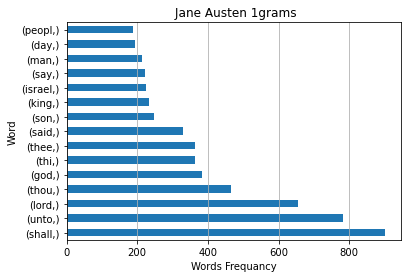

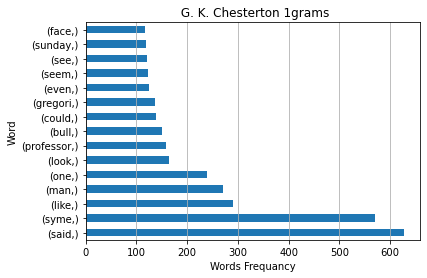

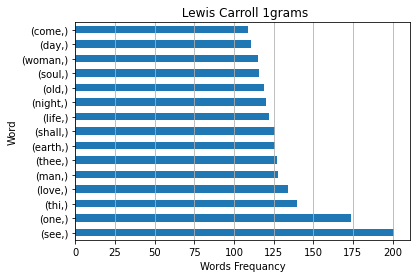

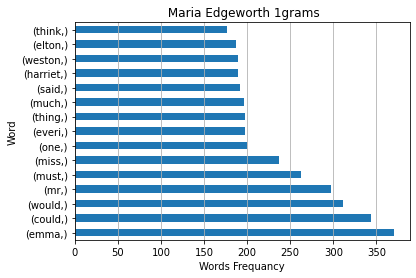

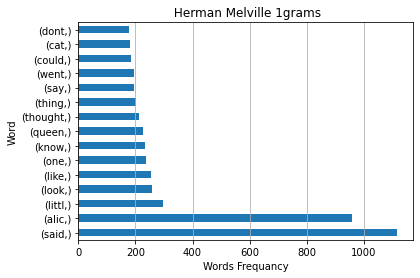

In [22]:
TextDataPartitioning.PotCommonWords(Books)

# Text Vectorization

In [15]:
# TRansform Your Featrues
X_Bow , Transformer_Bow =  TrasForm.TransForm("BOW",Books["paragraph"],0,0)

# TF_IDF
X_Tf_IDF , Transformer_TDIDF =  TrasForm.TransForm("TF_IDF",Books["paragraph"],0,0)

# TF_IDF 2_Gram
X_2Gram , Transformer_Bow =  TrasForm.TransForm("TFIDF_NGram",Books["paragraph"],2,2)

#Word2Vec
word2vec = TrasForm.TransForm("W2V_Encoder",Books["paragraph"],0,0)


C:\Users\mm\AppData\Local\Temp/ipykernel_8340/224498192.py:38: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model1.init_sims(replace=True)


## LDA

In [ ]:
import gensim
from gensim import corpora

def lda_training(data ,n_topics):
  docs=[]
  for i in data :
    docs.append(i.split())

  dictionary = corpora.Dictionary(docs)
  bow = [dictionary.doc2bow(partition) for partition in docs]  # bag of words for each partition
  example = pd.DataFrame(bow[10], columns=["token_id", "frequency"])

  lda_model = gensim.models.LdaModel(bow,
               id2word = dictionary,
               num_topics = n_topics,
               random_state = 100,
               passes = 50,
               iterations = 500, 
               chunksize = 100
               )
  coherence_lda = gensim.models.coherencemodel.CoherenceModel(model=lda_model, texts= docs , dictionary=dictionary , coherence='c_v')
  coherence_lda = coherence_lda.get_coherence()
  # print('\nCoherence Score: ', coherence_lda)
  # print(lda_model.print_topics())
  return lda_model , bow , coherence_lda

In [ ]:
LDA_model , corpus , coherence_lda = lda_training(data['Partations'],n_topics = 5)

In [ ]:
def feature_vectorize(lda ,corpus):
  # Convert target column from string to numbers 
  data.label = pd.Categorical(data.label)
  data['label'] = data.label.cat.codes
    
  train_vecs = []
  for i in range(len(data['Partations'])):
    top_topics = lda.get_document_topics(corpus[i], minimum_probability = 0.0)
    topic_vec = [top_topics[i][1] for i in range(len(lda.print_topics()))]
    train_vecs.append(topic_vec)

  features = pd.DataFrame(train_vecs)
  lda_data = features.join(data["label"])#.sample(frac = 1)

  lda_x = lda_data[lda_data.columns[:-1]]
  lda_y = pd.DataFrame(lda_data[lda_data.columns[-1]])
  return lda_data, lda_x, lda_y

In [ ]:
lda_data, lda_x, lda_y = feature_vectorize(LDA_model ,corpus)

 Check Best number of PCA components 
 Plot Scree Plot

100
200
300
400
500
600
700
800
900
1000


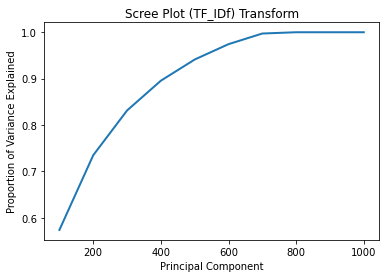

In [16]:
#BOW
TrasForm.Test_Best_PCA_com(X_Bow,[x for x in range(1,11)],100,"BoW")


In [77]:
X_SVD_Bow , Bow_SVD = TrasForm.SVD(X_Bow,700)

100
200
300
400
500
600
700
800
900
1000


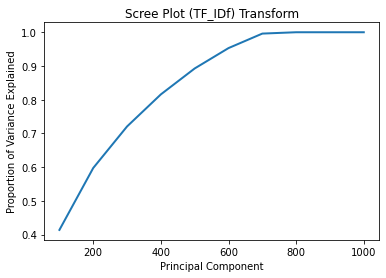

In [18]:
#Tf_idf
TrasForm.Test_Best_PCA_com(X_Tf_IDF,[x for x in range(1,11)],100,"TF_IDf")

In [78]:
X_SVD_Tf_idf  ,TF_idf_SVD  = TrasForm.SVD(X_Tf_IDF,700)

In [25]:
#2Gram
TrasForm.Test_Best_PCA_com(X_2Gram,[x for x in range(1,11)],100,"2Gram")

100
200
300
400
500


In [ ]:
# X_SVD_2Gram , Gram2_SVD = TrasForm.SVD(X_2Gram,700)

In [ ]:
#Word2Vec
TrasForm.Test_Best_PCA_com(word2vec,[x for x in range(1,11)],100,"Word2Vec")

In [ ]:
# X_SVD_Word2Vec , Word2Vec_SVD = TrasForm.SVD(Word2Vec,700)

## Visualize Transformed Data

In [6]:
Visulaize_Data(X_Tf_IDF,Y,"TF_IDF Data")

Visulaize_Data(X_Tf_IDF,Y,"BOW Data")

Visulaize_Data(X_Tf_IDF,Y,"2Gram Data")

Visulaize_Data(X_Tf_IDF,Y,"Word2Vec Data")

NameError: name 'Visulaize_Data' is not defined

## Metric Functions

In [22]:
#Import
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.cluster import AgglomerativeClustering
import wordcloud

In [23]:
def silhouette_Scores(X ,labels ):
       return silhouette_score(X, labels , metric='eculdine')

In [24]:
def Test_Models(X, labels,Culter_Labels):
    print('-------------------------------------')
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, Culter_Labels))
    print("Completeness: %0.3f" % metrics.completeness_score(labels,Culter_Labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels,Culter_Labels))
    print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, Culter_Labels))
    print("Silhouette Coefficient: %0.3f"  % metrics.silhouette_score(X, Culter_Labels,metric='cosine'))
    print("Kappa: %.3f" % cohen_kappa_score(labels, Culter_Labels))
    print('-------------------------------------')



## Error Analysis Functions

In [30]:
def ReName_Clusters(Labels,True_Labels):
    numberOFclusers =len(np.unique(Labels))
    
    TrueBooks = np.zeros_like(Labels)
    # Key Book
    #Vale claster
    Dic= {}
    
    for clusterNum in range(0,numberOFclusers):
        
        all_DataPoint_In_Cluster  = np.where(Labels == clusterNum)
        
        vals, counts = np.unique( True_Labels[all_DataPoint_In_Cluster] , return_counts=True)
        print(np.unique( True_Labels[all_DataPoint_In_Cluster] , return_counts=True))
        mode_value = vals[np.argwhere(counts == np.max(counts))[0][0]]
        Dic[mode_value] = clusterNum       
        for data_point in all_DataPoint_In_Cluster:
            
            TrueBooks[data_point]=int(mode_value)
    return TrueBooks ,Dic

In [ ]:
def Error_any(Data ,Transformer , Labels , TrueLabels):
    from collections import Counter
    
    #Get All Wrong clustring point 
    WrongPoints = Data[ Labels != TrueLabels] 
    
    NumnerOFWrong = WrongPoints.shape[0]
    print(f"Number of Wrong points {NumnerOFWrong}")
    
    #Inverse Transform All paragapth into text again
    All_Wrong_String = []
    for DataPoint in WrongPoints:
        str_centers = ' '.join(Transformer.inverse_transform(DataPoint.reshape(1,-1))[0].tolist())
        All_Wrong_String.append(str_centers)
    
    #Get the most 10 frequent words in all wrong clustres
    MostCommon10 =  Counter(' '.join(All_Wrong_String).split()).most_common(10)

    #create df to append results on it and use for ploting
    df = pd.DataFrame(columns=['Book','word','count'])

    # for each word in most 10 common words in wrong clusters 
    # get the count of the frequent of this word in 5 books
    for Word in MostCommon10:
        Authors =  Books['Authors'].unique()
       
        for Auther in Authors:
                count = ' '.join(Books.loc[Books['Authors']==Auther , 'paragraph']).count(Word[0])
                WordCount = {'Book':Auther , 'word':Word[0] , 'count':count }
                df_dictionary = pd.DataFrame([WordCount])
                df = pd.concat([df,df_dictionary],ignore_index=True)
     

    sns.barplot(x='word', y='count' , hue="Book" , data=df )
    plt.show()


# KMeans Model

In [17]:
def Kmeans(X,K):
    km = KMeans(n_clusters=K, init='k-means++', max_iter=300, n_init=50,verbose=1 ,random_state=1)
    km.fit(X)
    return km

In [26]:
def Choose_Best_K(Data,k_start , k_end  , figsize1 = 10 , figsize2 = 5 ):  
  wcss = []
  silhouette_scores = []
  for k in range(k_start,k_end):
      kmeanModel =Kmeans(Data,k)
      wcss.append(kmeanModel.inertia_)
      
      # Calculate Silhoutte Score 
      silhouette_scores.append(silhouette_Scores(Data,kmeanModel.labels_))


  #k_mean plot
  plt.plot(range(k_start,k_end), wcss, 'bx-')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  plt.title('Elbow Method(k-means)')
  plt.show()
  
  # #silhouette plot
  plt.plot(range(k_start,k_end), silhouette_scores, 'bx-')
  plt.xlabel('Number of clusters')
  plt.ylabel('silhouette Score ')
  plt.title('silhouette Scores(k-means)')
  plt.show()                      


## Kmean_TF_IDF

plot silhouette and WCSS to choose best K 

Initialization complete
Iteration 0, inertia 1872.4014726773585.
Iteration 1, inertia 939.8285424925334.
Iteration 2, inertia 932.9950346660999.
Iteration 3, inertia 932.6936843909965.
Iteration 4, inertia 932.6194510234059.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 1857.8892724660898.
Iteration 1, inertia 942.2044156589441.
Iteration 2, inertia 936.0309810848523.
Iteration 3, inertia 933.8462704972777.
Iteration 4, inertia 932.7712514530203.
Iteration 5, inertia 932.6278618510828.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 1842.2370940806622.
Iteration 1, inertia 939.1027263030007.
Iteration 2, inertia 931.781952296062.
Iteration 3, inertia 931.0608241611627.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 1848.0165206270178.
Iteration 1, inertia 938.4479708248546.
Iteration 2, inertia 931.73234045048.
Iteration 3, inertia 931.2094144241204.
Itera

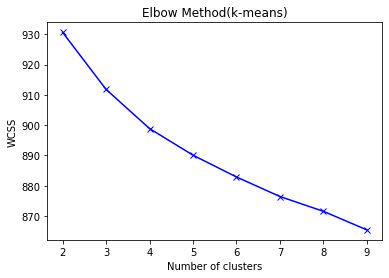

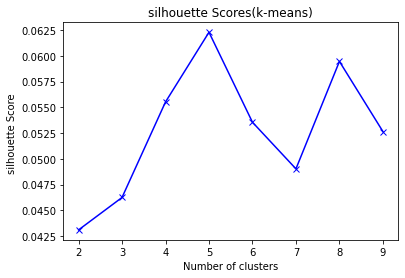

([930.6533634531581,
  911.8152744777631,
  898.8821701832732,
  890.0979862186496,
  882.9038469767081,
  876.4528183766383,
  871.5755655186875,
  865.4361334999985],
 [0.04309896642991693,
  0.046246918137341136,
  0.05551753742075756,
  0.06228418342913279,
  0.053549199377271976,
  0.0490266050701423,
  0.05945263941372471,
  0.052649187300507445])

In [25]:
Choose_Best_K(X_Tf_IDF,2,10)

In [27]:
km =Kmeans(X_Tf_IDF,5)

Initialization complete
Iteration 0, inertia 1769.7464153986216.
Iteration 1, inertia 905.0488586459838.
Iteration 2, inertia 900.8761989622712.
Iteration 3, inertia 898.2980282059971.
Iteration 4, inertia 896.5993496981635.
Iteration 5, inertia 895.8703348206379.
Iteration 6, inertia 894.345663302196.
Iteration 7, inertia 891.7635965925533.
Iteration 8, inertia 890.3007119734434.
Iteration 9, inertia 890.2139258631709.
Iteration 10, inertia 890.1747935716854.
Iteration 11, inertia 890.1624682358997.
Iteration 12, inertia 890.1415455887043.
Iteration 13, inertia 890.1315619202288.
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 1760.339382271984.
Iteration 1, inertia 904.7464316943484.
Iteration 2, inertia 897.5834051240207.
Iteration 3, inertia 896.3609444717724.
Iteration 4, inertia 895.8907438045144.
Iteration 5, inertia 895.8475444780756.
Iteration 6, inertia 895.814138417104.
Iteration 7, inertia 895.801928030236.
Iteration 8, inertia 89

Caculate Metrics 

In [35]:
#Map between Clusters and Books
Labels , MabDic= ReName_Clusters(km.labels_,Y)

Test_Models(X_Tf_IDF,Y,Labels)

(array([0, 2, 3]), array([ 19,  19, 196], dtype=int64))
(array([4]), array([200], dtype=int64))
(array([2, 3]), array([181,   4], dtype=int64))
(array([0]), array([181], dtype=int64))
(array([1]), array([200], dtype=int64))
-------------------------------------
Homogeneity: 0.907
Completeness: 0.910
V-measure: 0.908
Adjusted Rand-Index: 0.899
Silhouette Coefficient: 0.062
Kappa: 0.948
-------------------------------------


c:\Users\mm\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\mm\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.080s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.305632
[t-SNE] Computed conditional probabilities in 0.038s
[t-SNE] Iteration 50: error = 64.9015121, gradient norm = 0.2612475 (50 iterations in 0.263s)
[t-SNE] Iteration 100: error = 63.7750320, gradient norm = 0.2486960 (50 iterations in 0.305s)
[t-SNE] Iteration 150: error = 63.4127121, gradient norm = 0.2568580 (50 iterations in 0.257s)
[t-SNE] Iteration 200: error = 64.3766174, gradient norm = 0.2422771 (50 iterations in 0.237s)
[t-SNE] Iteration 250: error = 63.6457787, gradient norm = 0.2480476 (50 iterations in 0.228s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.645779
[t-SNE] Iteration 300: error = 0.9288203, gradient norm = 0.0019864 (50 iterations in 0.199s)
[t-SNE] Iteration 350: error = 0.8083249, gradient norm = 0.0004

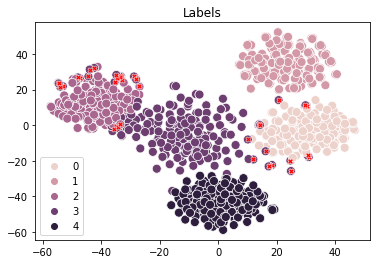

In [39]:
Visulaize_Data_With_WrongPoints(X_Tf_IDF,Labels, Y,"Labels")


## Kmean_BOW

In [ ]:
Choose_Best_K(X_Bow,2,10)

In [ ]:
km =Kmeans(X_Bow,5)

In [43]:
#Map between Clusters and Books
Labels , MabDic= ReName_Clusters(km.labels_,Y)

Test_Models(X_Bow,Y,Labels)

(array([2, 3]), array([34,  3], dtype=int64))
(array([0, 2]), array([161,   1], dtype=int64))
(array([2, 3]), array([131,   4], dtype=int64))
(array([0, 1, 2, 3, 4]), array([ 39,  13,  34, 193, 200], dtype=int64))
(array([1]), array([187], dtype=int64))
-------------------------------------
Homogeneity: 0.615
Completeness: 0.783
V-measure: 0.689
Adjusted Rand-Index: 0.530
Silhouette Coefficient: 0.074
Kappa: 0.641
-------------------------------------


c:\Users\mm\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\mm\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.089s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.305632
[t-SNE] Computed conditional probabilities in 0.036s
[t-SNE] Iteration 50: error = 64.9015121, gradient norm = 0.2612475 (50 iterations in 0.254s)
[t-SNE] Iteration 100: error = 63.7750320, gradient norm = 0.2486960 (50 iterations in 0.208s)
[t-SNE] Iteration 150: error = 63.4127121, gradient norm = 0.2568580 (50 iterations in 0.217s)
[t-SNE] Iteration 200: error = 64.3766174, gradient norm = 0.2422771 (50 iterations in 0.211s)
[t-SNE] Iteration 250: error = 63.6457787, gradient norm = 0.2480476 (50 iterations in 0.209s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.645779
[t-SNE] Iteration 300: error = 0.9288203, gradient norm = 0.0019864 (50 iterations in 0.205s)
[t-SNE] Iteration 350: error = 0.8083249, gradient norm = 0.0004

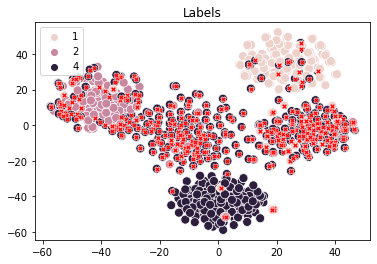

In [49]:
Visulaize_Data_With_WrongPoints(X_Tf_IDF,Labels, Y,"Labels")


## Kmean_2Gram

plot silhouette and WCSS to choose best K 

Initialization complete
Iteration 0, inertia 1988.2558301401193.
Iteration 1, inertia 994.5556637339772.
Iteration 2, inertia 993.887966934448.
Iteration 3, inertia 993.7326612473203.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 1984.3839990807724.
Iteration 1, inertia 995.0880922547437.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1985.0426247109035.
Iteration 1, inertia 994.9391604658131.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1984.8929683985045.
Iteration 1, inertia 994.5330010971636.
Iteration 2, inertia 994.4285016995009.
Iteration 3, inertia 994.4064470665645.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 1979.9364703213191.
Iteration 1, inertia 994.756572543692.
Iteration 2, inertia 994.7270614020235.
Iteration 3, inertia 994.7175120321656.
Converged at iteration 3: strict convergence.
Initial

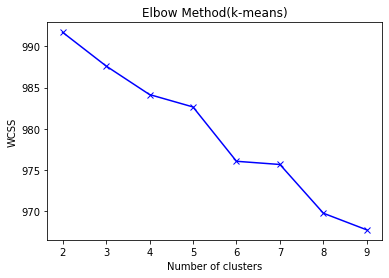

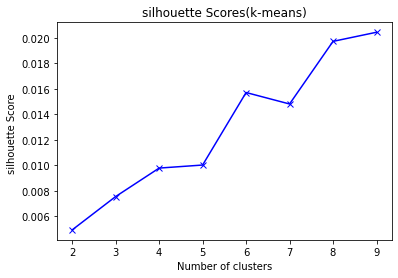

In [50]:
Choose_Best_K(X_2Gram,2,10)

In [51]:
km =Kmeans(X_2Gram,5)

Initialization complete
Iteration 0, inertia 1957.289079759588.
Iteration 1, inertia 986.0149552237394.
Iteration 2, inertia 985.0246645026696.
Iteration 3, inertia 984.7387937399916.
Iteration 4, inertia 984.4952866127084.
Iteration 5, inertia 984.4418804109105.
Iteration 6, inertia 984.3869246447159.
Iteration 7, inertia 984.3288619924781.
Iteration 8, inertia 984.2724593852678.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 1953.94919768506.
Iteration 1, inertia 984.5909429246756.
Iteration 2, inertia 983.3557929589582.
Iteration 3, inertia 982.8951318524164.
Iteration 4, inertia 982.7864733629447.
Iteration 5, inertia 982.7570688210288.
Iteration 6, inertia 982.7375290716708.
Iteration 7, inertia 982.7278095969375.
Iteration 8, inertia 982.7180692690423.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 1956.6850175185978.
Iteration 1, inertia 985.6494547905206.
Iteration 2, inertia 984.58273238634

Caculate Metrics 

In [52]:
#Map between Clusters and Books
Labels , MabDic= ReName_Clusters(km.labels_,Y)

Test_Models(X_2Gram,Y,Labels)

(array([0, 2, 3, 4]), array([  5, 136,  12,   3], dtype=int64))
(array([0, 1, 2, 3]), array([18, 53,  4,  2], dtype=int64))
(array([0, 1, 4]), array([ 8, 45,  6], dtype=int64))
(array([0, 1]), array([ 3, 81], dtype=int64))
(array([0, 1, 2, 3, 4]), array([166,  21,  60, 186, 191], dtype=int64))
-------------------------------------
Homogeneity: 0.314
Completeness: 0.551
V-measure: 0.400
Adjusted Rand-Index: 0.258
Silhouette Coefficient: 0.006
Kappa: 0.382
-------------------------------------


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.051s...


c:\Users\mm\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\mm\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.132780
[t-SNE] Computed conditional probabilities in 0.050s
[t-SNE] Iteration 50: error = 65.4621658, gradient norm = 0.2714092 (50 iterations in 0.336s)
[t-SNE] Iteration 100: error = 66.2377701, gradient norm = 0.2484068 (50 iterations in 0.307s)
[t-SNE] Iteration 150: error = 65.9019775, gradient norm = 0.2629186 (50 iterations in 0.303s)
[t-SNE] Iteration 200: error = 65.9538727, gradient norm = 0.2679731 (50 iterations in 0.279s)
[t-SNE] Iteration 250: error = 66.4994202, gradient norm = 0.2546168 (50 iterations in 0.359s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.499420
[t-SNE] Iteration 300: error = 1.4415631, gradient norm = 0.0028282 (50 iterations in 0.194s)
[t-SNE] Iteration 350: error = 1.2752997, gradient norm = 0.0012437 (50 iterations in 0.208s)
[t-SNE] Iteration 400: error = 1.2262397, gradient norm = 0.0003232 (50 iterations in 0.187s)
[t-SNE] Iteration 

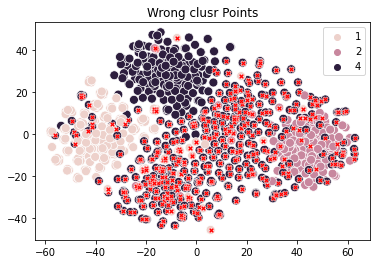

In [53]:
Visulaize_Data_With_WrongPoints(X_2Gram,Labels, Y,"Wrong clusr Points")


## Kmean_word2vec

plot silhouette and WCSS to choose best K 

c:\Users\mm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Initialization complete
Iteration 0, inertia 13691.080078125.
Iteration 1, inertia 8425.396484375.
Iteration 2, inertia 8341.3251953125.
Iteration 3, inertia 8299.869140625.
Iteration 4, inertia 8284.3134765625.
Iteration 5, inertia 8273.2197265625.
Iteration 6, inertia 8269.37890625.
Iteration 7, inertia 8268.3359375.
Iteration 8, inertia 8267.31640625.
Iteration 9, inertia 8266.4677734375.
Iteration 10, inertia 8266.037109375.
Iteration 11, inertia 8265.751953125.
Iteration 12, inertia 8265.716796875.
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 14109.1533203125.
Iteration 1, inertia 8390.9951171875.
Iteration 2, inertia 8307.0048828125.
Iteration 3, inertia 8287.1376953125.
Iteration 4, inertia 8274.009765625.
Iteration 5, inertia 8269.5498046875.
Iteration 6, inertia 8268.3359375.
Iteration 7, inertia 8267.31640625.
Iteration 8, inertia 8266.4677734375.
Iteration 9, inertia 8266.037109375.
Iteration 10, inertia 8265.751953125.
Iteratio

c:\Users\mm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Initialization complete
Iteration 0, inertia 12543.904296875.
Iteration 1, inertia 8098.90380859375.
Iteration 2, inertia 7625.611328125.
Iteration 3, inertia 7478.6904296875.
Iteration 4, inertia 7443.01171875.
Iteration 5, inertia 7437.8125.
Iteration 6, inertia 7436.9736328125.
Iteration 7, inertia 7436.6328125.
Iteration 8, inertia 7436.3447265625.
Iteration 9, inertia 7436.1484375.
Iteration 10, inertia 7436.10546875.
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 13805.35546875.
Iteration 1, inertia 7564.79541015625.
Iteration 2, inertia 7517.98388671875.
Iteration 3, inertia 7500.31787109375.
Iteration 4, inertia 7490.89306640625.
Iteration 5, inertia 7481.431640625.
Iteration 6, inertia 7473.40576171875.
Iteration 7, inertia 7465.8359375.
Iteration 8, inertia 7459.72021484375.
Iteration 9, inertia 7453.16455078125.
Iteration 10, inertia 7448.19921875.
Iteration 11, inertia 7445.603515625.
Iteration 12, inertia 7443.2197265625.
Iterat

c:\Users\mm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Initialization complete
Iteration 0, inertia 12047.4765625.
Iteration 1, inertia 7804.7705078125.
Iteration 2, inertia 7383.9951171875.
Iteration 3, inertia 7224.60205078125.
Iteration 4, inertia 7178.65185546875.
Iteration 5, inertia 7161.6416015625.
Iteration 6, inertia 7152.21435546875.
Iteration 7, inertia 7142.4013671875.
Iteration 8, inertia 7131.43994140625.
Iteration 9, inertia 7116.45654296875.
Iteration 10, inertia 7096.44287109375.
Iteration 11, inertia 7076.509765625.
Iteration 12, inertia 7060.99853515625.
Iteration 13, inertia 7056.58984375.
Iteration 14, inertia 7051.9482421875.
Iteration 15, inertia 7049.06640625.
Iteration 16, inertia 7047.16259765625.
Iteration 17, inertia 7045.39794921875.
Iteration 18, inertia 7042.8837890625.
Iteration 19, inertia 7040.669921875.
Iteration 20, inertia 7039.4990234375.
Iteration 21, inertia 7038.19189453125.
Iteration 22, inertia 7036.45947265625.
Iteration 23, inertia 7034.265625.
Iteration 24, inertia 7033.4189453125.
Iteration 25

c:\Users\mm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Initialization complete
Iteration 0, inertia 11664.263671875.
Iteration 1, inertia 7268.0146484375.
Iteration 2, inertia 7006.6259765625.
Iteration 3, inertia 6926.998046875.
Iteration 4, inertia 6880.408203125.
Iteration 5, inertia 6839.71630859375.
Iteration 6, inertia 6814.24560546875.
Iteration 7, inertia 6802.5087890625.
Iteration 8, inertia 6795.083984375.
Iteration 9, inertia 6790.15380859375.
Iteration 10, inertia 6788.1484375.
Iteration 11, inertia 6786.29541015625.
Iteration 12, inertia 6784.78955078125.
Iteration 13, inertia 6782.04736328125.
Iteration 14, inertia 6780.5849609375.
Iteration 15, inertia 6779.9931640625.
Iteration 16, inertia 6779.32275390625.
Iteration 17, inertia 6778.98974609375.
Iteration 18, inertia 6778.251953125.
Iteration 19, inertia 6776.56787109375.
Iteration 20, inertia 6773.69287109375.
Iteration 21, inertia 6771.67822265625.
Iteration 22, inertia 6769.97021484375.
Iteration 23, inertia 6769.34033203125.
Iteration 24, inertia 6769.076171875.
Iterat

c:\Users\mm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Initialization complete
Iteration 0, inertia 11155.005859375.
Iteration 1, inertia 6832.32470703125.
Iteration 2, inertia 6703.5712890625.
Iteration 3, inertia 6645.998046875.
Iteration 4, inertia 6596.193359375.
Iteration 5, inertia 6575.1904296875.
Iteration 6, inertia 6569.57177734375.
Iteration 7, inertia 6565.59765625.
Iteration 8, inertia 6564.68017578125.
Iteration 9, inertia 6564.03564453125.
Iteration 10, inertia 6563.25.
Iteration 11, inertia 6562.80615234375.
Iteration 12, inertia 6562.61669921875.
Iteration 13, inertia 6562.564453125.
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 11917.408203125.
Iteration 1, inertia 6973.58935546875.
Iteration 2, inertia 6735.88232421875.
Iteration 3, inertia 6635.77490234375.
Iteration 4, inertia 6592.09765625.
Iteration 5, inertia 6579.5556640625.
Iteration 6, inertia 6574.10986328125.
Iteration 7, inertia 6570.0693359375.
Iteration 8, inertia 6567.423828125.
Iteration 9, inertia 6565.2133789

c:\Users\mm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Initialization complete
Iteration 0, inertia 10926.966796875.
Iteration 1, inertia 6722.39208984375.
Iteration 2, inertia 6569.05859375.
Iteration 3, inertia 6505.5478515625.
Iteration 4, inertia 6471.8056640625.
Iteration 5, inertia 6454.3046875.
Iteration 6, inertia 6447.64794921875.
Iteration 7, inertia 6445.02734375.
Iteration 8, inertia 6443.689453125.
Iteration 9, inertia 6442.38818359375.
Iteration 10, inertia 6441.2802734375.
Iteration 11, inertia 6440.4423828125.
Iteration 12, inertia 6439.46533203125.
Iteration 13, inertia 6438.6748046875.
Iteration 14, inertia 6438.22265625.
Iteration 15, inertia 6438.005859375.
Iteration 16, inertia 6437.59765625.
Iteration 17, inertia 6437.27685546875.
Iteration 18, inertia 6436.9853515625.
Iteration 19, inertia 6436.74169921875.
Iteration 20, inertia 6436.4814453125.
Iteration 21, inertia 6436.25927734375.
Converged at iteration 21: strict convergence.
Initialization complete
Iteration 0, inertia 10722.9501953125.
Iteration 1, inertia 664

c:\Users\mm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Initialization complete
Iteration 0, inertia 10076.6845703125.
Iteration 1, inertia 6640.82421875.
Iteration 2, inertia 6442.6591796875.
Iteration 3, inertia 6382.76513671875.
Iteration 4, inertia 6358.9951171875.
Iteration 5, inertia 6338.2548828125.
Iteration 6, inertia 6326.5498046875.
Iteration 7, inertia 6316.998046875.
Iteration 8, inertia 6310.8291015625.
Iteration 9, inertia 6301.9990234375.
Iteration 10, inertia 6283.60009765625.
Iteration 11, inertia 6273.4306640625.
Iteration 12, inertia 6268.716796875.
Iteration 13, inertia 6265.4169921875.
Iteration 14, inertia 6263.9755859375.
Iteration 15, inertia 6263.2109375.
Iteration 16, inertia 6262.880859375.
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 10578.0478515625.
Iteration 1, inertia 6699.3447265625.
Iteration 2, inertia 6416.20654296875.
Iteration 3, inertia 6353.7822265625.
Iteration 4, inertia 6329.26611328125.
Iteration 5, inertia 6308.99755859375.
Iteration 6, inertia 6291

c:\Users\mm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Initialization complete
Iteration 0, inertia 9791.955078125.
Iteration 1, inertia 6442.53369140625.
Iteration 2, inertia 6265.2255859375.
Iteration 3, inertia 6218.5166015625.
Iteration 4, inertia 6197.84326171875.
Iteration 5, inertia 6187.2373046875.
Iteration 6, inertia 6178.607421875.
Iteration 7, inertia 6173.3154296875.
Iteration 8, inertia 6166.68017578125.
Iteration 9, inertia 6159.341796875.
Iteration 10, inertia 6155.630859375.
Iteration 11, inertia 6154.50390625.
Iteration 12, inertia 6154.056640625.
Iteration 13, inertia 6153.97802734375.
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 9705.7958984375.
Iteration 1, inertia 6405.671875.
Iteration 2, inertia 6285.05712890625.
Iteration 3, inertia 6253.0947265625.
Iteration 4, inertia 6237.173828125.
Iteration 5, inertia 6227.6142578125.
Iteration 6, inertia 6222.2392578125.
Iteration 7, inertia 6216.4580078125.
Iteration 8, inertia 6210.47607421875.
Iteration 9, inertia 6203.3027343

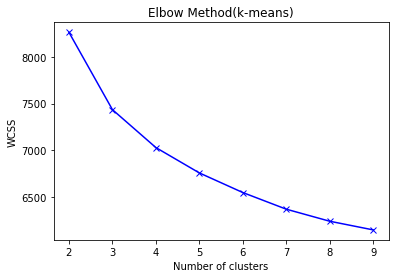

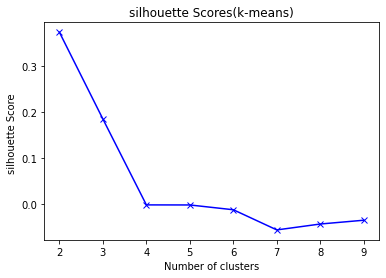

In [54]:
Choose_Best_K(word2vec,2,10)

In [55]:
km =Kmeans(word2vec,5)

c:\Users\mm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Initialization complete
Iteration 0, inertia 11664.263671875.
Iteration 1, inertia 7268.0146484375.
Iteration 2, inertia 7006.6259765625.
Iteration 3, inertia 6926.998046875.
Iteration 4, inertia 6880.4091796875.
Iteration 5, inertia 6839.71630859375.
Iteration 6, inertia 6814.24609375.
Iteration 7, inertia 6802.5087890625.
Iteration 8, inertia 6795.083984375.
Iteration 9, inertia 6790.15380859375.
Iteration 10, inertia 6788.1484375.
Iteration 11, inertia 6786.29541015625.
Iteration 12, inertia 6784.78955078125.
Iteration 13, inertia 6782.0478515625.
Iteration 14, inertia 6780.58447265625.
Iteration 15, inertia 6779.9931640625.
Iteration 16, inertia 6779.3232421875.
Iteration 17, inertia 6778.98974609375.
Iteration 18, inertia 6778.251953125.
Iteration 19, inertia 6776.56787109375.
Iteration 20, inertia 6773.69287109375.
Iteration 21, inertia 6771.67822265625.
Iteration 22, inertia 6769.97021484375.
Iteration 23, inertia 6769.34033203125.
Iteration 24, inertia 6769.076171875.
Iteration

Caculate Metrics 

In [56]:
#Map between Clusters and Books
Labels , MabDic= ReName_Clusters(km.labels_,Y)

Test_Models(word2vec,Y,Labels)

(array([0, 1, 2, 3, 4]), array([61, 64, 58, 51, 57], dtype=int64))
(array([0, 1, 2, 3, 4]), array([32, 45, 44, 51, 46], dtype=int64))
(array([0, 1, 2, 3, 4]), array([57, 37, 52, 53, 40], dtype=int64))
(array([0, 1, 2, 3, 4]), array([29, 30, 30, 24, 40], dtype=int64))
(array([0, 1, 2, 3, 4]), array([21, 24, 16, 21, 17], dtype=int64))
-------------------------------------
Homogeneity: 0.006
Completeness: 0.007
V-measure: 0.006
Adjusted Rand-Index: 0.001
Silhouette Coefficient: 0.165
Kappa: 0.045
-------------------------------------


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.071s...


c:\Users\mm\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\mm\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 1000 samples in 0.680s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.016143
[t-SNE] Computed conditional probabilities in 0.035s
[t-SNE] Iteration 50: error = 65.0709686, gradient norm = 0.3194886 (50 iterations in 0.235s)
[t-SNE] Iteration 100: error = 65.9097443, gradient norm = 0.2869083 (50 iterations in 0.267s)
[t-SNE] Iteration 150: error = 65.7401581, gradient norm = 0.2693326 (50 iterations in 0.242s)
[t-SNE] Iteration 200: error = 66.7958984, gradient norm = 0.2737086 (50 iterations in 0.212s)
[t-SNE] Iteration 250: error = 65.8617096, gradient norm = 0.2802258 (50 iterations in 0.232s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.861710
[t-SNE] Iteration 300: error = 1.4325058, gradient norm = 0.0021064 (50 iterations in 0.187s)
[t-SNE] Iteration 350: error = 1.4057984, gradient norm = 0.0002365 (50 iterations in 0.197s)
[t-SNE] Iteration 400: error = 1.3939886, gradient norm

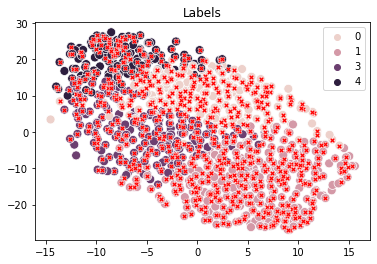

In [57]:
Visulaize_Data_With_WrongPoints(word2vec,Labels, Y,"Wrong clusr Points")


# Hierarchical 

In [60]:
import scipy.cluster.hierarchy as sch


## TF_IDF

In [58]:
hirichiral = AgglomerativeClustering(n_clusters = 5, affinity='euclidean', linkage = 'ward')

In [59]:
hirichiral_TF = hirichiral.fit_predict(X_Tf_IDF.toarray())

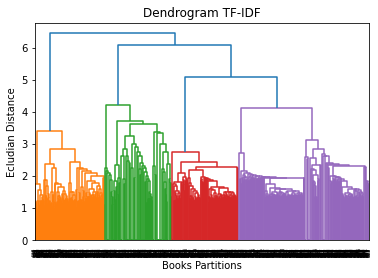

In [62]:
plt_dendrogram = sch.dendrogram(sch.linkage(X_Tf_IDF.toarray(),method = 'ward'))
plt.title("Dendrogram TF-IDF")
plt.xlabel('Books Partitions')
plt.ylabel('Ecludian Distance')
plt.show()


In [73]:
Labels , MabDic= ReName_Clusters(hirichiral_TF,Y)


(array([0, 1, 2, 3, 4]), array([200,   2,   6, 191,   4], dtype=int64))
(array([2, 3]), array([153,   8], dtype=int64))
(array([1, 2]), array([196,   1], dtype=int64))
(array([1, 4]), array([  2, 196], dtype=int64))
(array([2, 3]), array([40,  1], dtype=int64))


In [72]:
Test_Models(X_Tf_IDF,Y,Labels)

-------------------------------------
Homogeneity: 0.757
Completeness: 0.916
V-measure: 0.829
Adjusted Rand-Index: 0.728
Silhouette Coefficient: 0.055
Kappa: 0.731
-------------------------------------


c:\Users\mm\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\mm\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.098s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.305632
[t-SNE] Computed conditional probabilities in 0.044s
[t-SNE] Iteration 50: error = 64.9015121, gradient norm = 0.2612475 (50 iterations in 0.554s)
[t-SNE] Iteration 100: error = 63.7750320, gradient norm = 0.2486960 (50 iterations in 0.389s)
[t-SNE] Iteration 150: error = 63.4127121, gradient norm = 0.2568580 (50 iterations in 0.247s)
[t-SNE] Iteration 200: error = 64.3766174, gradient norm = 0.2422771 (50 iterations in 0.211s)
[t-SNE] Iteration 250: error = 63.6457787, gradient norm = 0.2480476 (50 iterations in 0.238s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.645779
[t-SNE] Iteration 300: error = 0.9288203, gradient norm = 0.0019864 (50 iterations in 0.200s)
[t-SNE] Iteration 350: error = 0.8083249, gradient norm = 0.0004

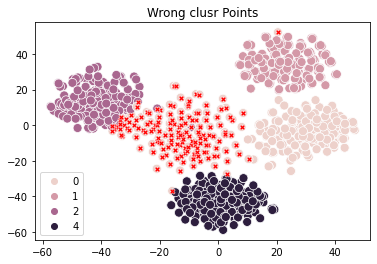

In [65]:
Visulaize_Data_With_WrongPoints(X_Tf_IDF,Labels, Y,"Wrong clusr Points")

## BOW

In [66]:
hirichiral = AgglomerativeClustering(n_clusters = 5, affinity='euclidean', linkage = 'ward')

In [67]:
hirichiral_TF = hirichiral.fit_predict(X_Bow.toarray())

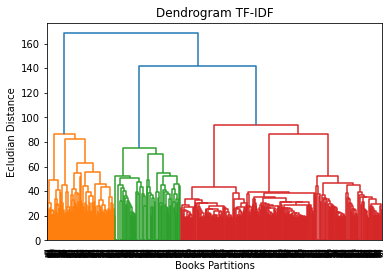

In [68]:
plt_dendrogram = sch.dendrogram(sch.linkage(X_Bow.toarray(),method = 'ward'))
plt.title("Dendrogram TF-IDF")
plt.xlabel('Books Partitions')
plt.ylabel('Ecludian Distance')
plt.show()


In [69]:
Labels , MabDic= ReName_Clusters(hirichiral_TF,Y)


(array([0, 1, 2, 3, 4]), array([200,   2,   6, 191,   4], dtype=int64))
(array([2, 3]), array([153,   8], dtype=int64))
(array([1, 2]), array([196,   1], dtype=int64))
(array([1, 4]), array([  2, 196], dtype=int64))
(array([2, 3]), array([40,  1], dtype=int64))


In [70]:
Test_Models(X_Bow,Y,Labels)

-------------------------------------
Homogeneity: 0.757
Completeness: 0.916
V-measure: 0.829
Adjusted Rand-Index: 0.728
Silhouette Coefficient: 0.083
Kappa: 0.731
-------------------------------------


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...


c:\Users\mm\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\mm\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 1000 samples in 0.094s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 5.172031
[t-SNE] Computed conditional probabilities in 0.041s
[t-SNE] Iteration 50: error = 69.2468414, gradient norm = 0.3138098 (50 iterations in 0.325s)
[t-SNE] Iteration 100: error = 70.0430984, gradient norm = 0.2746904 (50 iterations in 0.260s)
[t-SNE] Iteration 150: error = 69.9703369, gradient norm = 0.2696222 (50 iterations in 0.242s)
[t-SNE] Iteration 200: error = 71.2944946, gradient norm = 0.2569817 (50 iterations in 0.235s)
[t-SNE] Iteration 250: error = 68.9289017, gradient norm = 0.2857198 (50 iterations in 0.244s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.928902
[t-SNE] Iteration 300: error = 0.9881014, gradient norm = 0.0016707 (50 iterations in 0.186s)
[t-SNE] Iteration 350: error = 0.8913484, gradient norm = 0.0004599 (50 iterations in 0.181s)
[t-SNE] Iteration 400: error = 0.8582983, gradient norm

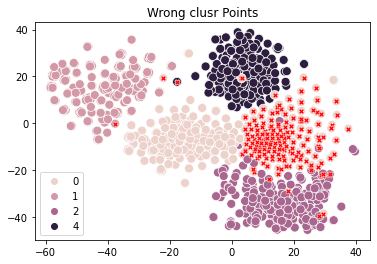

In [71]:
Visulaize_Data_With_WrongPoints(X_Bow,Labels, Y,"Wrong clusr Points")

# EM

## TF_IDF

In [74]:
from sklearn.mixture import GaussianMixture

In [79]:
gmm = GaussianMixture(n_components=5)
em_labels = gmm.fit_predict(X_SVD_Tf_idf)

c:\Users\mm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [80]:
Labels , MabDic= ReName_Clusters(em_labels,Y)

(array([0, 2, 3]), array([ 10,  16, 196], dtype=int64))
(array([2, 3]), array([184,   4], dtype=int64))
(array([0]), array([190], dtype=int64))
(array([4]), array([200], dtype=int64))
(array([1]), array([200], dtype=int64))


In [84]:
Test_Models(X_SVD_Tf_idf,Y,Labels)

-------------------------------------
Homogeneity: 0.927
Completeness: 0.928
V-measure: 0.928
Adjusted Rand-Index: 0.927
Silhouette Coefficient: 0.063
Kappa: 0.963
-------------------------------------


c:\Users\mm\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\mm\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.174s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.309266
[t-SNE] Computed conditional probabilities in 0.038s
[t-SNE] Iteration 50: error = 67.8826752, gradient norm = 0.2566239 (50 iterations in 0.489s)
[t-SNE] Iteration 100: error = 65.6140060, gradient norm = 0.2663178 (50 iterations in 0.447s)
[t-SNE] Iteration 150: error = 66.5062637, gradient norm = 0.2494060 (50 iterations in 0.241s)
[t-SNE] Iteration 200: error = 67.2976990, gradient norm = 0.2260814 (50 iterations in 0.219s)
[t-SNE] Iteration 250: error = 66.4028473, gradient norm = 0.2438865 (50 iterations in 0.217s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.402847
[t-SNE] Iteration 300: error = 1.0020337, gradient norm = 0.0021502 (50 iterations in 0.194s)
[t-SNE] Iteration 350: error = 0.8639121, gradient norm = 0.0006

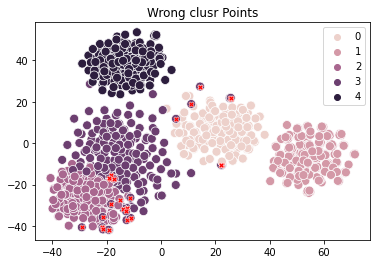

In [83]:
Visulaize_Data_With_WrongPoints(X_SVD_Tf_idf,Labels, Y,"Wrong clusr Points")

## BOW

In [85]:
gmm = GaussianMixture(n_components=5)
em_labels = gmm.fit_predict(X_SVD_Bow)

c:\Users\mm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [86]:
Labels , MabDic= ReName_Clusters(em_labels,Y)

(array([0, 1, 2, 3, 4]), array([ 32,   2,  34, 196, 200], dtype=int64))
(array([0, 1]), array([ 2, 71], dtype=int64))
(array([0, 2]), array([166,   2], dtype=int64))
(array([2, 3]), array([164,   4], dtype=int64))
(array([1]), array([127], dtype=int64))


In [87]:
Test_Models(X_SVD_Bow,Y,Labels)

-------------------------------------
Homogeneity: 0.650
Completeness: 0.819
V-measure: 0.725
Adjusted Rand-Index: 0.577
Silhouette Coefficient: 0.076
Kappa: 0.660
-------------------------------------


c:\Users\mm\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\mm\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.184s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 5.194838
[t-SNE] Computed conditional probabilities in 0.042s
[t-SNE] Iteration 50: error = 69.6684113, gradient norm = 0.2811239 (50 iterations in 0.393s)
[t-SNE] Iteration 100: error = 70.7081909, gradient norm = 0.2637319 (50 iterations in 0.272s)
[t-SNE] Iteration 150: error = 70.4965820, gradient norm = 0.2601249 (50 iterations in 0.236s)
[t-SNE] Iteration 200: error = 70.2080231, gradient norm = 0.2848243 (50 iterations in 0.530s)
[t-SNE] Iteration 250: error = 70.4496918, gradient norm = 0.2645847 (50 iterations in 0.332s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.449692
[t-SNE] Iteration 300: error = 1.0938761, gradient norm = 0.0021623 (50 iterations in 0.259s)
[t-SNE] Iteration 350: error = 0.9346476, gradient norm = 0.0007

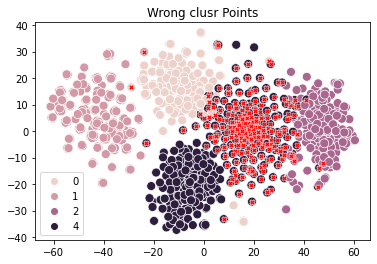

In [88]:
Visulaize_Data_With_WrongPoints(X_SVD_Bow,Labels, Y,"Wrong clusr Points")

# Error analysis

In [92]:
def Error_any(Data ,Transformer , Labels , TrueLabels):
    from collections import Counter
    
    #Get All Wrong clustring point 
    WrongPoints = Data[ Labels != TrueLabels] 
    
    NumnerOFWrong = WrongPoints.shape[0]
    print(f"Number of Wrong points {NumnerOFWrong}")
    
    #Inverse Transform All paragapth into text again
    All_Wrong_String = []
    for DataPoint in WrongPoints:
        str_centers = ' '.join(Transformer.inverse_transform(DataPoint.reshape(1,-1))[0].tolist())
        All_Wrong_String.append(str_centers)
    
    #Get the most 10 frequent words in all wrong clustres
    MostCommon10 =  Counter(' '.join(All_Wrong_String).split()).most_common(10)

    #create df to append results on it and use for ploting
    df = pd.DataFrame(columns=['Book','word','count'])

    # for each word in most 10 common words in wrong clusters 
    # get the count of the frequent of this word in 5 books
    for Word in MostCommon10:
        Authors =  Books['Authors'].unique()
       
        for Auther in Authors:
                count = ' '.join(Books.loc[Books['Authors']==Auther , 'paragraph']).count(Word[0])
                WordCount = {'Book':Auther , 'word':Word[0] , 'count':count }
                df_dictionary = pd.DataFrame([WordCount])
                df = pd.concat([df,df_dictionary],ignore_index=True)
     

    sns.barplot(x='word', y='count' , hue="Book" , data=df )
    plt.show()


Number of Wrong points 272


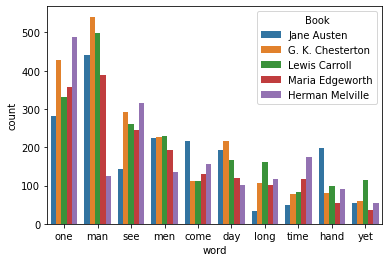

In [93]:
Error_any( X_Tf_IDF ,Transformer_TDIDF , Labels ,Y )